<a href="https://colab.research.google.com/github/robertvatasoiu/IC1/blob/main/IC1v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CITIRE DATE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from tqdm import tqdm
import time
import glob
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
daisy = os.listdir('/content/drive/MyDrive/IC1/flowers/daisy')
print(len(daisy))

764


In [ ]:
dandelion = os.listdir('/content/drive/MyDrive/IC1/flowers/dandelion')
print(len(dandelion))

1052


In [ ]:
rose  = os.listdir('/content/drive/MyDrive/IC1/flowers/rose')
print(len(rose))

784


In [ ]:
sunflower = os.listdir('/content/drive/MyDrive/IC1/flowers/sunflower')
print(len(sunflower))

733


In [ ]:
tulip = os.listdir('/content/drive/MyDrive/IC1/flowers/tulip')
print(len(tulip))

984


<h3> Setul de date contine:


*   764 flori din clasa <i> daisy</i>
*   1052 flori din clasa <i> dandelion </i>
*   784 flori din clasa <i> rose </i>
* 733 flori din clasa <i> sunflower </i>
* 984 flori din clasa <i> tulip </i>

In [3]:
def load(datadir):
        data = []
        labels = []
        for i in os.listdir(datadir):
            cat = os.path.join(datadir, i)
            for img in os.listdir(cat):
                image = cv2.imread(os.path.join(cat,img), cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (120, 120))
                data.append(image)
                labels.append(i)
        return (np.array(data), np.array(labels))

In [4]:
print("[INFO] loading dataset...")
imagePaths = '/content/drive/MyDrive/IC1/flowers'
print(os.listdir(imagePaths))
(X, y) = load(imagePaths)

[INFO] loading dataset...
['rose', 'daisy', 'dandelion', 'sunflower', 'tulip']


In [5]:
X.shape

(4317, 120, 120, 3)

In [6]:
y.shape

(4317,)

In [7]:
y[0:50]

array(['rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose', 'rose',
       'rose', 'rose'], dtype='<U9')

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3453, 120, 120, 3)
X_test:  (864, 120, 120, 3)
y_train:  (3453,)
y_test:  (864,)


In [10]:
y_train[0:50]

array(['rose', 'tulip', 'tulip', 'dandelion', 'dandelion', 'rose',
       'sunflower', 'rose', 'dandelion', 'daisy', 'dandelion',
       'dandelion', 'rose', 'sunflower', 'daisy', 'rose', 'rose',
       'dandelion', 'dandelion', 'daisy', 'daisy', 'daisy', 'sunflower',
       'tulip', 'tulip', 'dandelion', 'daisy', 'tulip', 'daisy',
       'dandelion', 'sunflower', 'rose', 'tulip', 'daisy', 'daisy',
       'rose', 'rose', 'tulip', 'rose', 'daisy', 'daisy', 'sunflower',
       'sunflower', 'tulip', 'dandelion', 'tulip', 'daisy', 'sunflower',
       'dandelion', 'daisy'], dtype='<U9')

In [11]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [12]:
labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

**Verificare distributie clase in train si test **

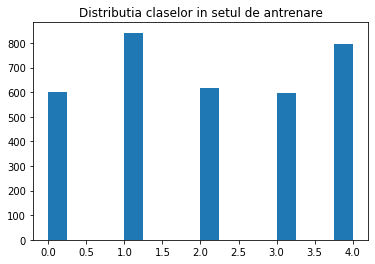

In [13]:
_ = plt.hist(y_train, bins='auto')  # arguments are passed to np.histogram
plt.title("Distributia claselor in setul de antrenare")
plt.show()


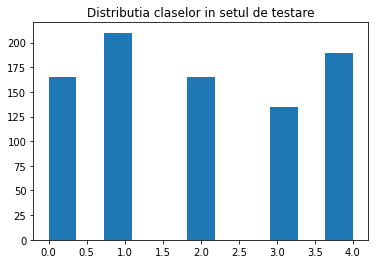

In [14]:
_ = plt.hist(y_test, bins='auto')  # arguments are passed to np.histogram
plt.title("Distributia claselor in setul de testare")
plt.show()

In [ ]:
X_train[0]

array([[[58, 59, 41],
        [57, 59, 41],
        [57, 58, 40],
        ...,
        [50,  0,  0],
        [53,  0,  0],
        [45,  0,  2]],

       [[58, 59, 41],
        [58, 59, 41],
        [58, 59, 41],
        ...,
        [53,  1,  0],
        [53,  0,  0],
        [45,  0,  0]],

       [[59, 60, 42],
        [59, 60, 42],
        [60, 61, 43],
        ...,
        [56,  0,  1],
        [55,  0,  0],
        [46,  1,  1]],

       ...,

       [[65, 67, 53],
        [65, 67, 53],
        [66, 69, 52],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[65, 67, 53],
        [65, 67, 53],
        [66, 69, 52],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[66, 68, 54],
        [65, 67, 53],
        [66, 69, 52],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [ ]:
X_test[0]

array([[[228, 236, 239],
        [230, 235, 239],
        [228, 234, 238],
        ...,
        [241, 242, 244],
        [239, 243, 244],
        [239, 243, 244]],

       [[227, 235, 238],
        [229, 234, 238],
        [228, 234, 238],
        ...,
        [240, 241, 243],
        [238, 242, 243],
        [238, 242, 243]],

       [[228, 236, 239],
        [229, 235, 238],
        [227, 234, 237],
        ...,
        [239, 240, 242],
        [237, 241, 242],
        [237, 241, 242]],

       ...,

       [[ 46,  64,  20],
        [ 53,  67,  11],
        [ 81,  94,  42],
        ...,
        [ 24,  25,   8],
        [ 39,  43,  17],
        [ 39,  51,   5]],

       [[ 52,  68,  22],
        [ 58,  74,  17],
        [ 74,  89,  35],
        ...,
        [ 13,  20,   5],
        [ 25,  30,  10],
        [ 32,  46,   4]],

       [[ 51,  68,  20],
        [ 55,  71,  21],
        [ 56,  71,  20],
        ...,
        [ 21,  28,  14],
        [ 18,  25,   3],
        [ 32,  47,   7]]

In [15]:
print(np.min(X_train),np.max(X_train))
print(np.min(X_test),np.max(X_test))

0 255
0 255


In [16]:
X_train = X_train/255.0
X_test = X_test/255.0


In [17]:
print(np.min(X_train),np.max(X_train))
print(np.min(X_test),np.max(X_test))

0.0 1.0
0.0 1.0


In [18]:
X_train_initial=X_train
X_test_initial=X_test

In [19]:
print(X_train_initial.shape, X_test_initial.shape)

(3453, 120, 120, 3) (864, 120, 120, 3)


In [20]:
X_train2 = X_train_initial.reshape(3453,120*120*3)
X_test2 = X_test_initial.reshape(864,120*120*3)
print(X_train2.shape, X_test2.shape)

(3453, 43200) (864, 43200)


<h1> Model pe descriptorul de culoare </h1>

In [21]:
model_culoare = SVC(kernel='rbf', C=30, gamma='auto')
start_time = time.time()

model_culoare.fit(X_train2, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_culoare = model_culoare.predict(X_test2)
print(confusion_matrix(y_test,pred_culoare))
print(classification_report(y_test,pred_culoare))
print('------------------')
print(model_culoare.score(X_test2, y_test))


--- 114.62238597869873 seconds ---
[[ 66  68  15   7   9]
 [ 19 160   2  13  16]
 [ 16  36  69   7  37]
 [  9  23   5  82  16]
 [ 20  33  50  16  70]]
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       165
           1       0.50      0.76      0.60       210
           2       0.49      0.42      0.45       165
           3       0.66      0.61      0.63       135
           4       0.47      0.37      0.42       189

    accuracy                           0.52       864
   macro avg       0.53      0.51      0.51       864
weighted avg       0.52      0.52      0.51       864

------------------
0.5173611111111112


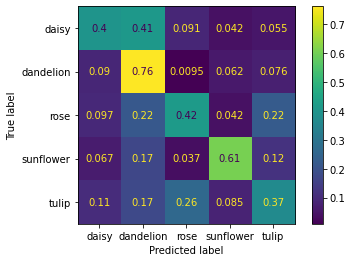

In [22]:
cm_culoare = confusion_matrix(y_test,pred_culoare)

cm_normata_culoare = cm_culoare.astype('float')/cm_culoare.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

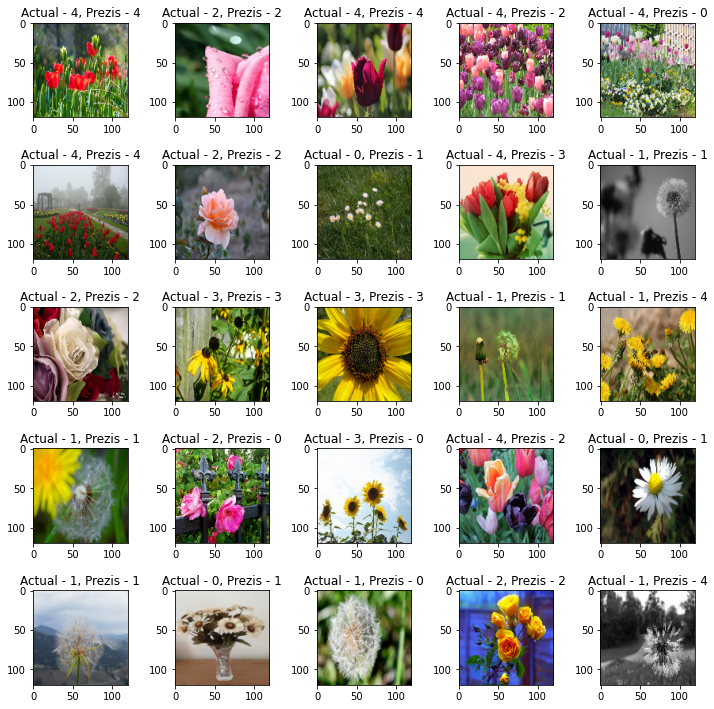

In [23]:
fig,ax=plt.subplots(5, 5)
fig.set_size_inches(10,10)
for i in range(5):
    for j in range (5):
        l=random.randint(0,len(X_test))
        image_to_look = X_test[l].reshape(120,120,3)
        ax[i,j].imshow(image_to_look)
        ax[i,j].set_title(f'Actual - {y_test[l]}, Prezis - {pred_culoare[l]}')
        

        
plt.tight_layout()

--- 120.30608057975769 seconds ---
[[ 76  54   5  10  20]
 [ 24 151   3  18  14]
 [ 23  29  59   6  48]
 [  6  20   5  92  12]
 [ 18  32  33  12  94]]
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       165
           1       0.53      0.72      0.61       210
           2       0.56      0.36      0.44       165
           3       0.67      0.68      0.67       135
           4       0.50      0.50      0.50       189

    accuracy                           0.55       864
   macro avg       0.55      0.54      0.54       864
weighted avg       0.55      0.55      0.54       864

------------------
0.5462962962962963


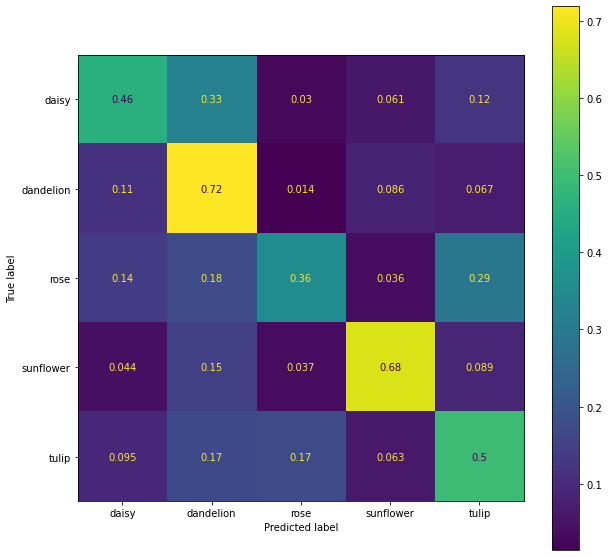

In [25]:
model_culoare2 = SVC(kernel='rbf', tol=1e-3, random_state = 5)
start_time = time.time()

model_culoare2.fit(X_train2, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_culoare2 = model_culoare2.predict(X_test2)
print(confusion_matrix(y_test,pred_culoare2))
print(classification_report(y_test,pred_culoare2))
print('------------------')
print(model_culoare2.score(X_test2, y_test))



###grafic

cm_culoare2 = confusion_matrix(y_test,pred_culoare2)

cm_normata_culoare2 = cm_culoare2.astype('float')/cm_culoare2.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare2,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()



**Aplicare HOG pe train si test **

In [26]:
features_train = []
hog_images_train=[]
for i in range(len(X_train_initial)):
  fd, hog_image = hog(X_train_initial[i], orientations = 9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
  features_train.append(fd)
  hog_images_train.append(hog_image)

features_train=np.array(features_train)
hog_images_train=np.array(hog_images_train)
print(features_train.shape)

In [27]:
features_train=np.array(features_train)
hog_images_train=np.array(hog_images_train)
print(features_train.shape)

(3453, 7056)


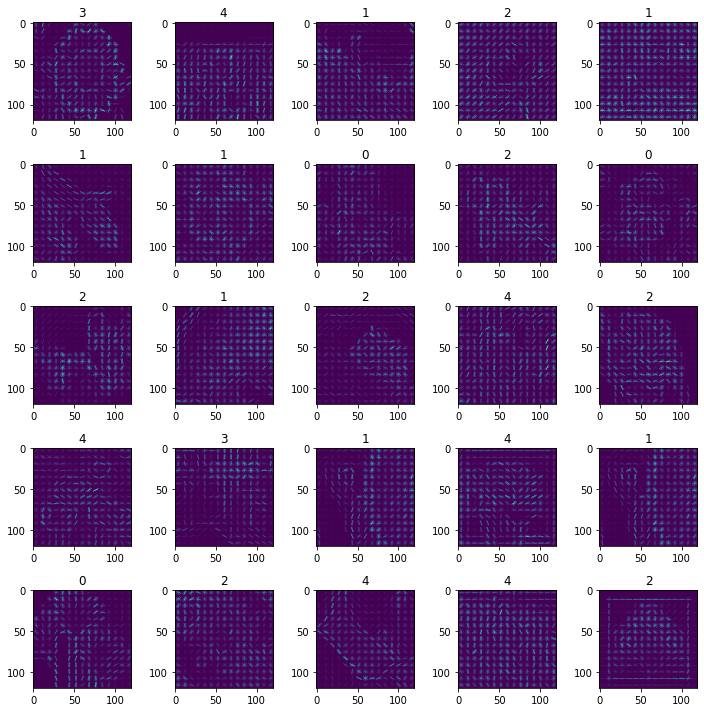

In [28]:
fig,ax=plt.subplots(5, 5)
fig.set_size_inches(10,10)
for i in range(5):
    for j in range (5):
        l=random.randint(0,len(features_train))
        
        ax[i,j].imshow(hog_images_train[l])
        ax[i,j].set_title(y_train[l])
        

        
plt.tight_layout()

In [29]:
features_test = []
hog_images_test=[]
for i in range(len(X_test_initial)):
  fd, hog_image = hog(X_test_initial[i], orientations = 9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
  features_test.append(fd)
  hog_images_test.append(hog_image)

features_test=np.array(features_test)
hog_images_test=np.array(hog_images_test)
print(features_test.shape)


(864, 7056)


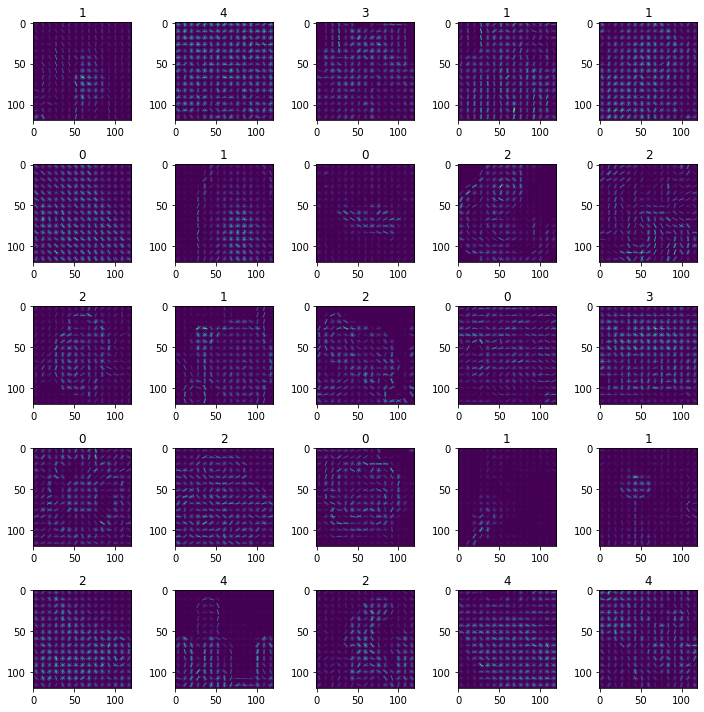

In [30]:
fig,ax=plt.subplots(5, 5)
fig.set_size_inches(10,10)
for i in range(5):
    for j in range (5):
        l=random.randint(0,len(features_test))
        
        ax[i,j].imshow(hog_images_test[l])
        ax[i,j].set_title(y_test[l])
        

        
plt.tight_layout()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

<h2> Model doar pe descriptorul HOG <h2>

--- 82.9016923904419 seconds ---
[[ 64  33  22  22  24]
 [ 16 125  22  25  22]
 [ 24  20  77  25  19]
 [ 23  17  11  65  19]
 [ 22  22  29  19  97]]
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       165
           1       0.58      0.60      0.59       210
           2       0.48      0.47      0.47       165
           3       0.42      0.48      0.45       135
           4       0.54      0.51      0.52       189

    accuracy                           0.50       864
   macro avg       0.49      0.49      0.49       864
weighted avg       0.50      0.50      0.49       864

------------------
0.49537037037037035


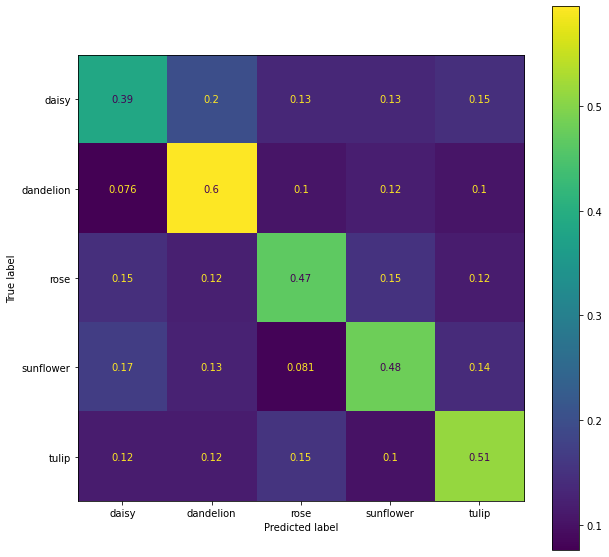

In [32]:
model_hog = SVC(kernel='rbf', C=30, gamma='auto')
start_time = time.time()

model_hog.fit(features_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_hog = model_hog.predict(features_test)
print(confusion_matrix(y_test,pred_hog))
print(classification_report(y_test,pred_hog))
print('------------------')
print(model_hog.score(features_test, y_test))



###grafic

cm_hog = confusion_matrix(y_test,pred_hog)

cm_normata_hog = cm_hog.astype('float')/cm_hog.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_hog,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


<h1> Model descriptor culoare + descriptor hog <h1>

In [33]:
X_train_culoare_hog = np.hstack([X_train2, features_train])
X_train_culoare_hog.shape

(3453, 50256)

In [34]:
X_test_culoare_hog = np.hstack([X_test2, features_test])
X_test_culoare_hog.shape

(864, 50256)

--- 165.47886872291565 seconds ---
[[ 76  41  15  16  17]
 [ 27 139  15  15  14]
 [ 23  19  81   8  34]
 [  7  16   9  90  13]
 [ 19  28  33  16  93]]
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       165
           1       0.57      0.66      0.61       210
           2       0.53      0.49      0.51       165
           3       0.62      0.67      0.64       135
           4       0.54      0.49      0.52       189

    accuracy                           0.55       864
   macro avg       0.55      0.55      0.55       864
weighted avg       0.55      0.55      0.55       864

------------------
0.5543981481481481


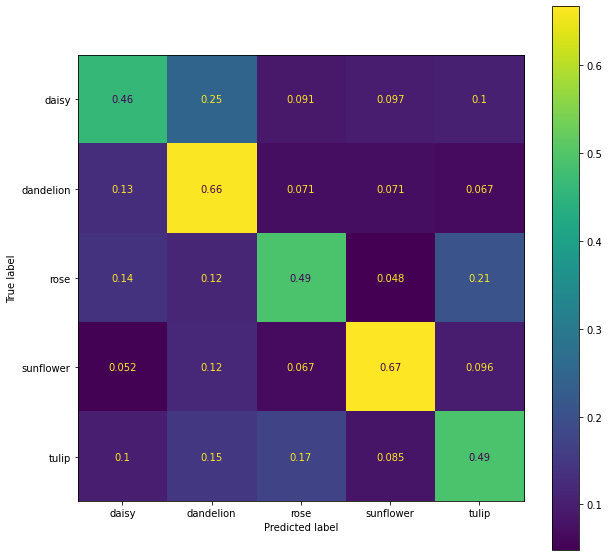

In [35]:
model_culoare_hog = SVC(kernel='rbf', C=30, gamma='auto')
start_time = time.time()

model_culoare_hog.fit(X_train_culoare_hog, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_culoare_hog = model_culoare_hog.predict(X_test_culoare_hog)
print(confusion_matrix(y_test,pred_culoare_hog))
print(classification_report(y_test,pred_culoare_hog))
print('------------------')
print(model_culoare_hog.score(X_test_culoare_hog, y_test))



###grafic

cm_culoare_hog = confusion_matrix(y_test,pred_culoare_hog)

cm_normata_culoare_hog = cm_culoare_hog.astype('float')/cm_culoare_hog.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_hog,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

--- 182.38528537750244 seconds ---
[[ 61  72   9   9  14]
 [ 13 155   9  16  17]
 [  8  31  83  10  33]
 [  5  29   6  85  10]
 [ 14  33  32  10 100]]
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       165
           1       0.48      0.74      0.58       210
           2       0.60      0.50      0.55       165
           3       0.65      0.63      0.64       135
           4       0.57      0.53      0.55       189

    accuracy                           0.56       864
   macro avg       0.58      0.55      0.56       864
weighted avg       0.57      0.56      0.55       864

------------------
0.5601851851851852


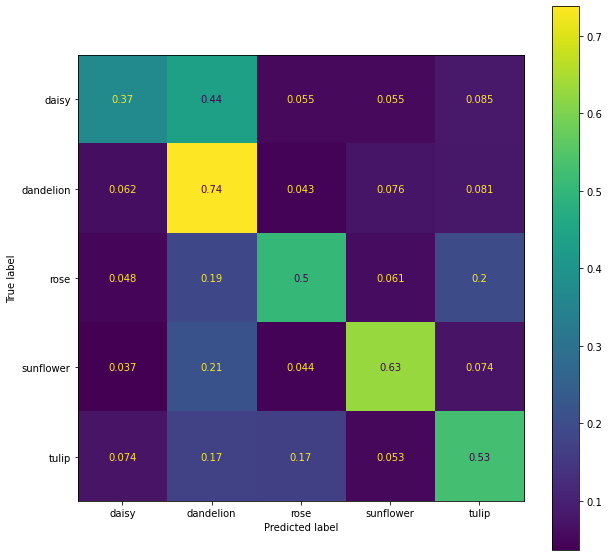

In [36]:
model_culoare_hog2 = SVC(kernel='poly', C=0.1, gamma=1)
start_time = time.time()

model_culoare_hog2.fit(X_train_culoare_hog, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_culoare_hog = model_culoare_hog2.predict(X_test_culoare_hog)
print(confusion_matrix(y_test,pred_culoare_hog))
print(classification_report(y_test,pred_culoare_hog))
print('------------------')
print(model_culoare_hog2.score(X_test_culoare_hog, y_test))



###grafic

cm_culoare_hog = confusion_matrix(y_test,pred_culoare_hog)

cm_normata_culoare_hog = cm_culoare_hog.astype('float')/cm_culoare_hog.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_hog,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

--- 183.27343845367432 seconds ---
[[ 61  72   9   9  14]
 [ 13 155   9  16  17]
 [  8  31  83  10  33]
 [  5  29   6  85  10]
 [ 14  33  32  10 100]]
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       165
           1       0.48      0.74      0.58       210
           2       0.60      0.50      0.55       165
           3       0.65      0.63      0.64       135
           4       0.57      0.53      0.55       189

    accuracy                           0.56       864
   macro avg       0.58      0.55      0.56       864
weighted avg       0.57      0.56      0.55       864

------------------
0.5601851851851852


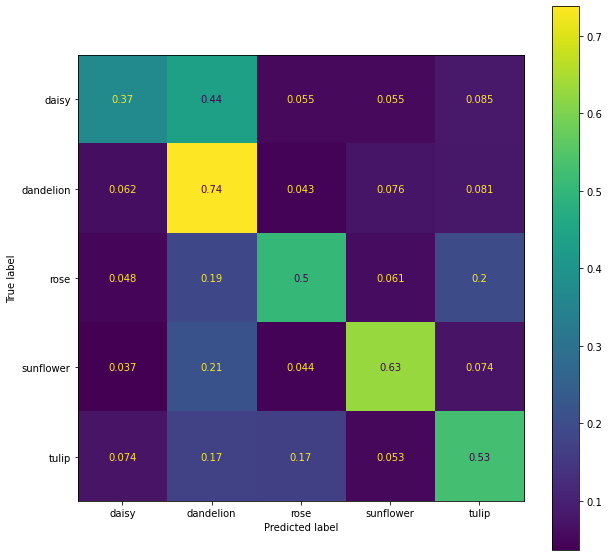

In [38]:
model_culoare_hog3 = SVC(kernel='poly', C=0.1, gamma=0.1)
start_time = time.time()

model_culoare_hog3.fit(X_train_culoare_hog, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_culoare_hog = model_culoare_hog3.predict(X_test_culoare_hog)
print(confusion_matrix(y_test,pred_culoare_hog))
print(classification_report(y_test,pred_culoare_hog))
print('------------------')
print(model_culoare_hog3.score(X_test_culoare_hog, y_test))



###grafic

cm_culoare_hog = confusion_matrix(y_test,pred_culoare_hog)

cm_normata_culoare_hog = cm_culoare_hog.astype('float')/cm_culoare_hog.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_hog,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

<h3> <b> hyperparameter tunning </b> </h3>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-6],
              'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, verbose = 3)
grid.fit(X_train_culoare_hog, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
rezultate=pd.DataFrame(grid.cv_results_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.245 total time= 6.7min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.243 total time= 6.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.243 total time= 6.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.243 total time= 6.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.245 total time= 6.8min
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.609 total time= 2.2min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.583 total time= 2.2min
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.592 total time= 2.2min
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.591 total time= 2.2min
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.596 total time= 2.2min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.245 total time= 7.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

<h1> Aplicare PCA <h1>


In [40]:
pca = PCA(0.98)
pca.fit(X_train_culoare_hog)

PCA(n_components=0.98)

In [49]:
#pca doar pe descriptor culoare

pca_culoare = PCA(0.98)
pca_culoare.fit(X_train2)
X_train_pca_culoare = pca_culoare.transform(X_train2)
X_test_pca_culoare = pca_culoare.transform(X_test2)
print("original shape train:   ", X_train2.shape)
print("transformed shape train:", X_train_pca_culoare.shape)
print("original shape test:   ", X_test2.shape)
print("transformed shape test:", X_test_pca_culoare.shape)


original shape train:    (3453, 43200)
transformed shape train: (3453, 1934)
original shape test:    (864, 43200)
transformed shape test: (864, 1934)


In [41]:
X_train_pca = pca.transform(X_train_culoare_hog)
X_test_pca = pca.transform(X_test_culoare_hog)

In [42]:
print("original shape train:   ", X_train_culoare_hog.shape)
print("transformed shape train:", X_train_pca.shape)

original shape train:    (3453, 50256)
transformed shape train: (3453, 2322)


In [43]:
print("original shape test:   ", X_test_culoare_hog.shape)
print("transformed shape test:", X_test_pca.shape)

original shape test:    (864, 50256)
transformed shape test: (864, 2322)


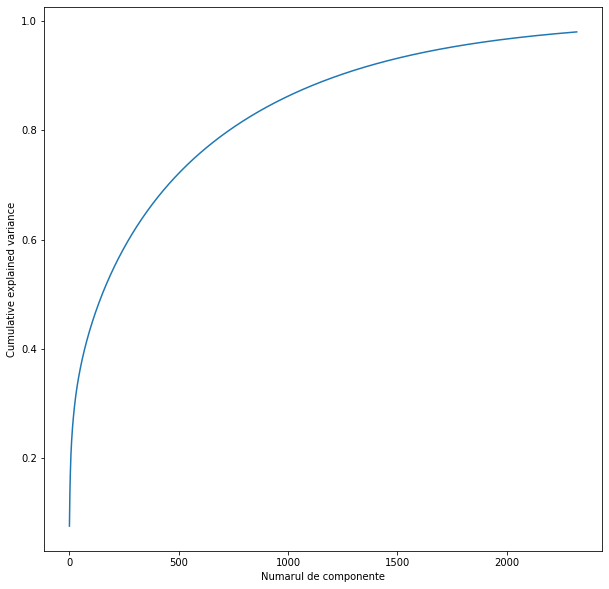

In [44]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.plot(cum_sum_eigenvalues)
plt.xlabel('Numarul de componente')
plt.ylabel('Cumulative explained variance');
plt.show()

<h1> <b>APLICARE PCA v2  </b></h1>

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(X_train2.shape[1])]

In [ ]:
df_flowers = pd.DataFrame(X_train2,columns=feat_cols)

In [ ]:
df_flowers['label'] = y_train
print('Size of the dataframe: {}'.format(df_flowers.shape))

Size of the dataframe: (3453, 43201)


In [ ]:
df_flowers.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel43191,pixel43192,pixel43193,pixel43194,pixel43195,pixel43196,pixel43197,pixel43198,pixel43199,label
0,0.227451,0.231373,0.160784,0.223529,0.231373,0.160784,0.223529,0.227451,0.156863,0.227451,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,0.007843,0.003922,0.000000,0.003922,0.000000,0.000000,0.007843,0.003922,0.000000,0.007843,...,0.082353,0.125490,0.058824,0.078431,0.125490,0.058824,0.070588,0.117647,0.058824,4
2,0.176471,0.168627,0.141176,0.227451,0.333333,0.235294,0.207843,0.184314,0.176471,0.203922,...,0.309804,0.270588,0.227451,0.313725,0.247059,0.211765,0.329412,0.294118,0.266667,4
3,0.015686,0.043137,0.011765,0.023529,0.050980,0.023529,0.035294,0.062745,0.031373,0.035294,...,0.019608,0.011765,0.015686,0.031373,0.019608,0.019608,0.027451,0.023529,0.015686,1
4,0.501961,0.658824,0.231373,0.521569,0.678431,0.243137,0.541176,0.690196,0.254902,0.552941,...,0.023529,0.219608,0.070588,0.019608,0.247059,0.054902,0.023529,0.258824,0.054902,1


In [ ]:
pca1 = PCA(n_components=2)
principalComponents_flower = pca1.fit_transform(df_flowers.iloc[:,:-1])
print("Numar total de componente imagine aplatizata", X_train.shape)
print("Numar de componente principale pastate dupa aplicarea PCA-ului",principalComponents_flower.shape)

Numar total de componente imagine aplatizata (3453, 120, 120, 3)
Numar de componente principale pastate dupa aplicarea PCA-ului (3453, 2)


In [ ]:
principalComponents_flower

array([[-41.01428165, -18.08527934],
       [ -3.77566554,   5.40892159],
       [ -6.37638583,  -7.58923897],
       ...,
       [ -4.61026577,  -0.45024758],
       [-19.84628886,   5.43769194],
       [ 44.64475305,  -2.31033669]])

In [ ]:
df = pd.DataFrame(principalComponents_flower, columns = ['principal component 1', 'principal component 2'])

In [ ]:
df['labels']=y_train

In [ ]:
df

,principal component 1,principal component 2,labels
0,-41.014282,-18.085279,2
1,-3.775666,5.408922,4
2,-6.376386,-7.589239,4
3,-0.415572,17.853789,1
4,23.330148,9.822991,1
...,...,...,...
3448,13.509693,16.272674,4
3449,-14.413139,-16.380450,2
3450,-4.610266,-0.450248,3
3451,-19.846289,5.437692,4


Text(0.5, 1.0, 'Clasificarea setului de date FLOWERS, folosind doar 2 componente principale')

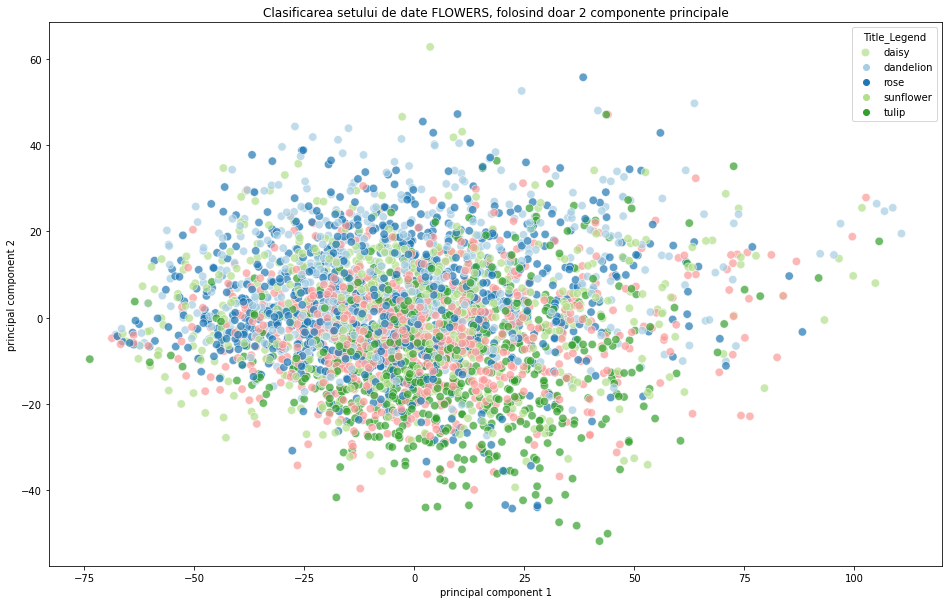

In [ ]:
from operator import index
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="labels",
    palette=sns.color_palette("Paired",  5),
    data=df,
    s=70,
    legend="full",
    alpha=0.7 
)
plt.legend(labels= labels, title = "Title_Legend")
plt.title('Clasificarea setului de date FLOWERS, folosind doar 2 componente principale')

<h3> Model culoare+hog+PCA varianta 98% </h3>

In [45]:
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

(3453, 2322)
(3453,)
(864, 2322)
(864,)


--- 21.839247941970825 seconds ---
[[  2 126   0   6  31]
 [  0 179   0   7  24]
 [  0  81   0   6  78]
 [  0  48   0  52  35]
 [  0  42   1  13 133]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       165
           1       0.38      0.85      0.52       210
           2       0.00      0.00      0.00       165
           3       0.62      0.39      0.47       135
           4       0.44      0.70      0.54       189

    accuracy                           0.42       864
   macro avg       0.49      0.39      0.31       864
weighted avg       0.48      0.42      0.32       864

------------------
0.4236111111111111


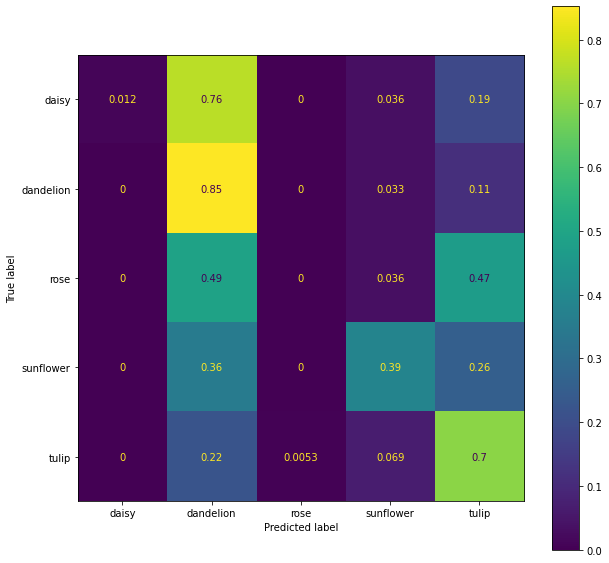

In [46]:
model_pca = SVC(kernel='rbf', C=30, gamma='auto')
start_time = time.time()

model_pca.fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_pca = model_pca.predict(X_test_pca)
print(confusion_matrix(y_test,pred_pca))
print(classification_report(y_test,pred_pca))
print('------------------')
print(model_pca.score(X_test_pca, y_test))



###grafic

cm_culoare_hog_pca = confusion_matrix(y_test,pred_pca)

cm_normata_culoare_hog_pca = cm_culoare_hog_pca.astype('float')/cm_culoare_hog_pca.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_hog_pca,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

--- 21.09717106819153 seconds ---
[[ 22 123   1   8  11]
 [  2 185   1  11  11]
 [  7  80  25  11  42]
 [  0  60   1  61  13]
 [  1  72   5   8 103]]
              precision    recall  f1-score   support

           0       0.69      0.13      0.22       165
           1       0.36      0.88      0.51       210
           2       0.76      0.15      0.25       165
           3       0.62      0.45      0.52       135
           4       0.57      0.54      0.56       189

    accuracy                           0.46       864
   macro avg       0.60      0.43      0.41       864
weighted avg       0.58      0.46      0.42       864

------------------
0.4583333333333333


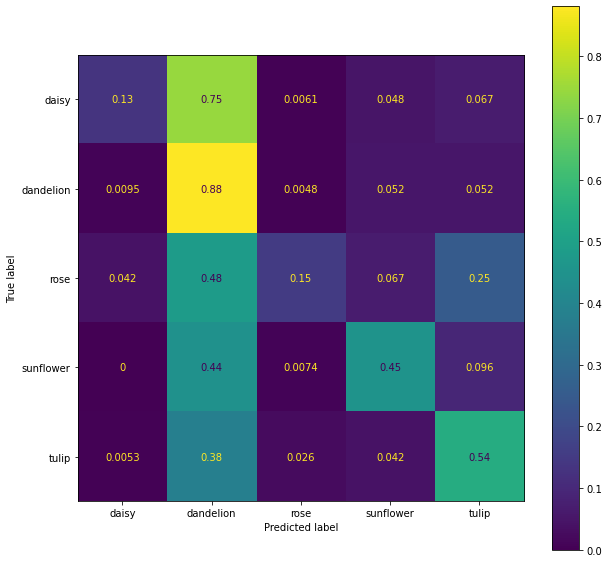

In [47]:
model_pca2 = SVC(kernel='poly', C=0.1, gamma=0.1)
start_time = time.time()

model_pca2.fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_pca = model_pca2.predict(X_test_pca)
print(confusion_matrix(y_test,pred_pca))
print(classification_report(y_test,pred_pca))
print('------------------')
print(model_pca2.score(X_test_pca, y_test))



###grafic

cm_culoare_hog_pca = confusion_matrix(y_test,pred_pca)

cm_normata_culoare_hog_pca = cm_culoare_hog_pca.astype('float')/cm_culoare_hog_pca.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_hog_pca,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

--- 15.319775342941284 seconds ---
[[ 72  56  13   6  18]
 [ 21 152  13  14  10]
 [ 20  24  77   9  35]
 [  6  20   9  86  14]
 [ 14  37  37  10  91]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       165
           1       0.53      0.72      0.61       210
           2       0.52      0.47      0.49       165
           3       0.69      0.64      0.66       135
           4       0.54      0.48      0.51       189

    accuracy                           0.55       864
   macro avg       0.56      0.55      0.55       864
weighted avg       0.56      0.55      0.55       864

------------------
0.5532407407407407


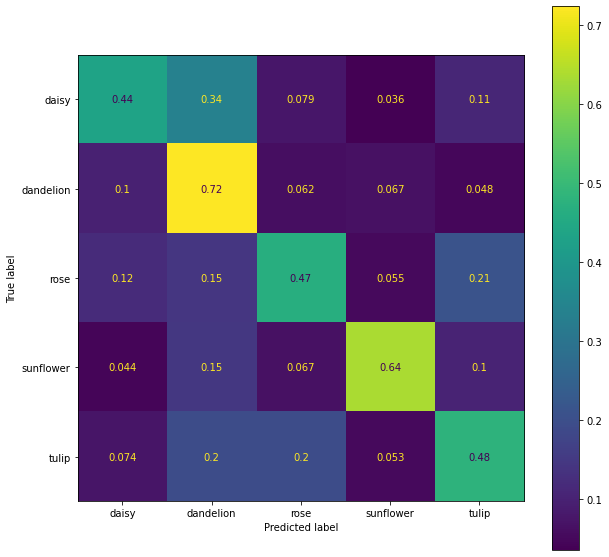

In [50]:
model_pca_doar_culoare = SVC(kernel='rbf', C=30, gamma='auto')
start_time = time.time()

model_pca_doar_culoare.fit(X_train_pca_culoare, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_pca_culoare = model_pca_doar_culoare.predict(X_test_pca_culoare)
print(confusion_matrix(y_test,pred_pca_culoare))
print(classification_report(y_test,pred_pca_culoare))
print('------------------')
print(model_pca_doar_culoare.score(X_test_pca_culoare, y_test))



###grafic

cm_culoare_pca = confusion_matrix(y_test,pred_pca_culoare)

cm_normata_culoare_pca = cm_culoare_pca.astype('float')/cm_culoare_pca.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_pca,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

--- 14.554574728012085 seconds ---
[[ 34 110  14   6   1]
 [ 12 167  12  14   5]
 [  9  65  68   7  16]
 [  3  42   4  71  15]
 [  6  93  34   8  48]]
              precision    recall  f1-score   support

           0       0.53      0.21      0.30       165
           1       0.35      0.80      0.49       210
           2       0.52      0.41      0.46       165
           3       0.67      0.53      0.59       135
           4       0.56      0.25      0.35       189

    accuracy                           0.45       864
   macro avg       0.53      0.44      0.44       864
weighted avg       0.51      0.45      0.43       864

------------------
0.44907407407407407


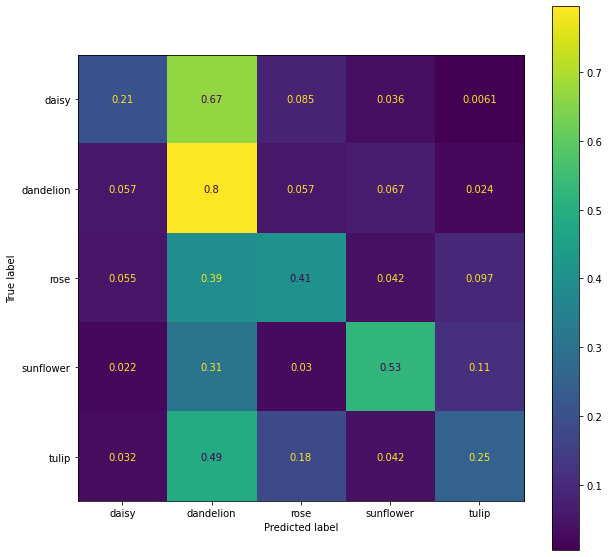

In [51]:
model_pca_doar_culoare2 = SVC(kernel='poly', C=0.1, gamma=0.1)
start_time = time.time()

model_pca_doar_culoare2.fit(X_train_pca_culoare, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

pred_pca_culoare = model_pca_doar_culoare2.predict(X_test_pca_culoare)
print(confusion_matrix(y_test,pred_pca_culoare))
print(classification_report(y_test,pred_pca_culoare))
print('------------------')
print(model_pca_doar_culoare2.score(X_test_pca_culoare, y_test))



###grafic

cm_culoare_pca = confusion_matrix(y_test,pred_pca_culoare)

cm_normata_culoare_pca = cm_culoare_pca.astype('float')/cm_culoare_pca.sum(axis=1)[:, np.newaxis]

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normata_culoare_pca,display_labels=labels)

disp.plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()